In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import Isomap
from sklearn.preprocessing import MinMaxScaler
#from scipy.cluster import DBSCAN
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import dbscan
#from sklearn.decomposition import PCA
from  os import listdir
#from sklearn.mixture import GMM
#from sklearn.cluster import KMeans


In [2]:
#name_data = listdir('/home/rasta/BD_stars/')[:10]

Объеденяю таблицы

In [3]:
Stars = pd.concat([pd.read_csv('/home/rasta/BD_stars/' + i) for i in listdir('/home/rasta/BD_stars/')[:50]], ignore_index=True)

In [4]:
#Stars.shape

In [5]:
#Stars.info()

In [6]:
Stars[Stars.teff_val > 8000].teff_val

4983      8335.0000
7081      8868.6670
8146      9532.0000
9409      9353.5000
13454     8468.2500
15754     8105.5000
16348     9537.5000
17295     9319.0000
17440     8561.3330
17793     8868.6670
18114     8868.6670
18254     8305.5000
20486     8059.6665
21820     8789.3330
22656     8904.0000
24470     8613.7500
26462     8818.5000
26954     8868.6670
26968     8851.7500
28135     8008.7500
28485     8074.0000
33520     8248.8870
34138     9183.0000
37550     9119.2500
37656     8046.7373
38064     8847.3330
41371     8536.6670
42915     9016.5000
45367     9117.0000
45547     8606.0000
            ...    
489364    8824.0000
489399    8628.3330
489968    8982.5000
493296    8582.6670
493405    8885.2500
494704    8048.0000
496169    9584.0000
501905    8765.5000
502207    8005.0000
505662    8785.6670
518588    9365.0000
521550    8312.0000
522472    8590.0000
523233    8868.6670
526208    8949.2500
526616    8083.7500
528519    8612.0000
537655    8868.6670
549360    8671.3330


Удаляю все таблицы с 'error', считая что они не очень помогут, дальше тоже удаляю разные штуки считая так же

In [7]:
Stars.columns

Index(['solution_id', 'designation', 'source_id', 'random_index', 'ref_epoch',
       'ra', 'ra_error', 'dec', 'dec_error', 'parallax', 'parallax_error',
       'parallax_over_error', 'pmra', 'pmra_error', 'pmdec', 'pmdec_error',
       'ra_dec_corr', 'ra_parallax_corr', 'ra_pmra_corr', 'ra_pmdec_corr',
       'dec_parallax_corr', 'dec_pmra_corr', 'dec_pmdec_corr',
       'parallax_pmra_corr', 'parallax_pmdec_corr', 'pmra_pmdec_corr',
       'astrometric_n_obs_al', 'astrometric_n_obs_ac',
       'astrometric_n_good_obs_al', 'astrometric_n_bad_obs_al',
       'astrometric_gof_al', 'astrometric_chi2_al', 'astrometric_excess_noise',
       'astrometric_excess_noise_sig', 'astrometric_params_solved',
       'astrometric_primary_flag', 'astrometric_weight_al',
       'astrometric_pseudo_colour', 'astrometric_pseudo_colour_error',
       'mean_varpi_factor_al', 'astrometric_matched_observations',
       'visibility_periods_used', 'astrometric_sigma5d_max',
       'frame_rotator_object_type',

In [8]:
d = ['solution_id', 'source_id', 'random_index', 'ref_epoch', 'ra', 'dec',
       'parallax', 'pmra', 'pmdec', 'ra_dec_corr', 'ra_parallax_corr',
       'ra_pmra_corr', 'ra_pmdec_corr', 'dec_parallax_corr', 'dec_pmra_corr',
       'dec_pmdec_corr', 'parallax_pmra_corr', 'parallax_pmdec_corr',
       'pmra_pmdec_corr', 'astrometric_n_obs_al', 'astrometric_n_obs_ac',
       'astrometric_n_good_obs_al', 'astrometric_n_bad_obs_al',
       'astrometric_chi2_al', 'astrometric_excess_noise',
        'astrometric_params_solved','flame_flags','astrometric_excess_noise_sig',
       'astrometric_primary_flag', 'astrometric_weight_al',
       'mean_varpi_factor_al','phot_g_n_obs','phot_rp_n_obs','phot_proc_mode',
       'astrometric_matched_observations', 'visibility_periods_used',
       'astrometric_sigma5d_max', 'frame_rotator_object_type',
       'matched_observations', 'duplicated_source', 'l', 'b', 'ecl_lon', 'ecl_lat', 'priam_flags', 'designation', 'phot_variable_flag']

In [9]:
# d = ['solution_id', 'source_id', 'random_index', 'ref_epoch', 'ra', 'dec',
#        'parallax', 'pmra', 'pmdec', 'ra_dec_corr', 'ra_parallax_corr',
#        'ra_pmra_corr', 'ra_pmdec_corr', 'dec_parallax_corr', 'dec_pmra_corr',
#        'dec_pmdec_corr', 'parallax_pmra_corr', 'parallax_pmdec_corr',
#        'pmra_pmdec_corr', 'astrometric_n_obs_al', 'astrometric_n_obs_ac',
#        'astrometric_n_good_obs_al', 'astrometric_n_bad_obs_al',
#        'astrometric_chi2_al', 'astrometric_excess_noise',
#         'astrometric_params_solved','flame_flags','a_g_val',
#        'astrometric_primary_flag', 'astrometric_weight_al', 'rv_template_teff', 'rv_template_logg','rv_template_fe_h',
#        'mean_varpi_factor_al','phot_g_n_obs','phot_rp_n_obs','phot_bp_n_obs','radial_velocity','rv_nb_transits',
#        'astrometric_matched_observations', 'visibility_periods_used','astrometric_gof_al','astrometric_excess_noise_sig',
#        'astrometric_sigma5d_max', 'frame_rotator_object_type','phot_proc_mode',
#        'matched_observations', 'duplicated_source', 'l', 'b', 'ecl_lon', 'ecl_lat', 'priam_flags', 'designation', 'phot_variable_flag']

In [10]:
Stars.drop(d, axis=1,inplace = True)

In [11]:
a = []
a = [i for i in Stars.columns if 'error' in i or 'lower' in i or 'upper' in i]
Stars = Stars.drop(a, axis=1)

In [12]:
Stars.dropna(inplace = True)

То что осталось

In [13]:
Stars       #.drop(['phot_variable_flag','designation'], axis=1, inplace = True)

,astrometric_gof_al,astrometric_pseudo_colour,phot_g_mean_flux,phot_g_mean_mag,phot_bp_n_obs,phot_bp_mean_flux,phot_bp_mean_mag,phot_rp_mean_flux,phot_rp_mean_mag,phot_bp_rp_excess_factor,...,radial_velocity,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,teff_val,a_g_val,e_bp_min_rp_val,radius_val,lum_val
22,8.846971,1.601738,3.359413e+05,11.872707,39,1.730723e+05,12.255819,2.321654e+05,11.347426,1.206275,...,-53.117800,8,5500.0,4.5,0.0,5513.0000,0.1813,0.0897,1.012708,0.853523
25,8.873156,1.497895,6.950464e+05,11.083331,29,2.848482e+05,11.714854,5.786433e+05,10.355893,1.242351,...,-23.382613,13,5000.0,3.0,0.0,4568.2876,0.2787,0.1325,11.873044,55.313686
224,8.630955,1.530124,3.916778e+05,11.706043,38,1.709541e+05,12.269189,3.122377e+05,11.025707,1.233646,...,-7.703486,14,4750.0,4.5,0.0,4831.4200,0.0323,0.0070,10.685327,56.049202
228,14.788583,1.660499,9.348866e+05,10.761468,32,5.479443e+05,11.004547,5.595276e+05,10.392366,1.184606,...,-6.023032,7,6500.0,4.5,0.0,6518.4100,0.1995,0.1053,1.350464,2.966384
422,5.065935,1.608176,1.522670e+05,12.731852,39,8.192566e+04,13.067839,1.022418e+05,12.237849,1.209503,...,-143.406634,16,5500.0,4.5,0.0,5796.0000,0.0725,0.0217,0.937588,0.893783
435,-0.315098,1.569674,1.222942e+05,12.969852,32,6.029315e+04,13.400719,8.853015e+04,12.394192,1.216929,...,-9.853717,7,4000.0,3.0,0.0,5296.0000,0.0987,0.0575,0.885909,0.556244
852,30.005770,1.621244,1.605203e+05,12.674540,36,8.374344e+04,13.044011,1.109324e+05,12.149274,1.212780,...,-25.093603,14,5500.0,4.5,0.0,5601.0000,0.2530,0.1300,1.079137,1.032548
1081,3.242357,1.609725,1.790465e+05,12.555951,37,9.504685e+04,12.906544,1.201515e+05,12.062597,1.201913,...,-24.768640,19,5500.0,3.5,0.0,5789.0000,0.1200,0.0655,1.047005,1.109192
1192,68.623060,1.507626,5.395512e+05,11.358284,37,2.368501e+05,11.915204,4.266506e+05,10.686739,1.229727,...,-45.386980,21,4500.0,4.5,0.0,4831.2500,0.0800,0.0230,9.900998,48.116135
1234,25.142143,1.629644,3.166951e+05,11.936763,38,1.744329e+05,12.247317,2.063780e+05,11.475262,1.202453,...,14.331357,16,6000.0,4.5,0.0,5952.0000,0.4950,0.2470,1.421007,2.283175


In [14]:
Stars.head()

,astrometric_gof_al,astrometric_pseudo_colour,phot_g_mean_flux,phot_g_mean_mag,phot_bp_n_obs,phot_bp_mean_flux,phot_bp_mean_mag,phot_rp_mean_flux,phot_rp_mean_mag,phot_bp_rp_excess_factor,...,radial_velocity,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,teff_val,a_g_val,e_bp_min_rp_val,radius_val,lum_val
22,8.846971,1.601738,335941.276100,11.872707,39,173072.296277,12.255819,232165.439772,11.347426,1.206275,...,-53.117800,8,5500.0,4.5,0.0,5513.0000,0.1813,0.0897,1.012708,0.853523
25,8.873156,1.497895,695046.377505,11.083331,29,284848.224727,11.714854,578643.300531,10.355893,1.242351,...,-23.382613,13,5000.0,3.0,0.0,4568.2876,0.2787,0.1325,11.873044,55.313686
224,8.630955,1.530124,391677.819675,11.706043,38,170954.127031,12.269189,312237.652099,11.025707,1.233646,...,-7.703486,14,4750.0,4.5,0.0,4831.4200,0.0323,0.0070,10.685327,56.049202
228,14.788583,1.660499,934886.628993,10.761468,32,547944.273699,11.004547,559527.619266,10.392366,1.184606,...,-6.023032,7,6500.0,4.5,0.0,6518.4100,0.1995,0.1053,1.350464,2.966384
422,5.065935,1.608176,152266.983530,12.731852,39,81925.663580,13.067839,102241.776532,12.237849,1.209503,...,-143.406634,16,5500.0,4.5,0.0,5796.0000,0.0725,0.0217,0.937588,0.893783


В x недостающие данные заменяются 0, их очень много, поэтому беру их 1000(что бы комп не завис на прорисовке)
В x1 строки с недостающими данными удаляются

In [15]:
#x = Stars.fillna(0)[:1000]
#x1 = [:]
#Stars.head()

Нормировка данных

In [16]:
scaler = MinMaxScaler()

In [17]:
x1 = scaler.fit_transform(Stars[:])

In [18]:
x1 = pd.DataFrame(x1, columns=Stars.columns)

In [19]:
#del scaler
del Stars

Увеличиваем признаки с низкой дисперсией

In [20]:
for i in ['phot_rp_mean_flux', 'phot_g_mean_flux', 'phot_bp_mean_flux',
       'astrometric_gof_al', 'lum_val', 'astrometric_pseudo_colour']:
    x1[i] = x1[i] * 10

In [21]:
#x1.var().sort_values()[:6].index

In [22]:
x1.shape

(5599, 23)

In [23]:
#del model
#del proj2
#model = Isomap(n_components=3, n_jobs=-1, n_neighbors=15)

Эта штука проецирует n мерные данные на 3-х мерные

In [24]:
#proj2 = model.fit_transform(x1)

Тут я перевожу эти данные в 3-х мерное пространство

In [25]:
#proj = model.fit_transform(x)

#plt.scatter(proj[:, 0], proj[:, 1], proj[:, 3])

Другая штука перевода в 3-х мерное пространсто

In [26]:
model = TSNE(n_components=3, learning_rate=10)
transformed = model.fit_transform(x1)

In [27]:
x_axis = transformed[:, 0]
y_axis = transformed[:, 1]
z_axis = transformed[:, 2]

это модель k-mean, первое это число соседей, второе это число центров

In [28]:
# model = KMeans(n_clusters = 10, n_jobs=-1, max_iter=3000, algorithm = 'full', init='random')
# l = model.fit(x1[:3500]).predict(x1[:3500])

Это GMM, число центров

In [286]:
# gmm = GMM(n_components=5).fit(x1)
# labels = gmm.predict(x1)


In [288]:
# %matplotlib notebook
# fig = plt.figure()
# ax = plt.axes(projection='3d')
# ax.scatter3D(proj2[:, 0], proj2[:, 1], proj2[:, 2], c = labels)
# #ax.scatter3D(proj2[:, 0], proj2[:, 1], proj2[:, 2], c = l)

In [36]:
# %matplotlib notebook
# fig = plt.figure()
# ax = plt.axes(projection='3d')
# #ax.scatter3D(proj2[:, 0], proj2[:, 1], proj2[:, 2], c = labels)
# ax.scatter3D(proj2[:, 0], proj2[:, 1], proj2[:, 2], c = l)

In [107]:
# %matplotlib notebook
# fig = plt.figure()
# ax = plt.axes(projection='3d')
# ax.scatter3D(x_axis, y_axis, z_axis, c = l)


In [287]:
# %matplotlib notebook
# fig = plt.figure()
# ax = plt.axes(projection='3d')
# ax.scatter3D(x_axis, y_axis, z_axis, c = labels)


ну тут визуализация разныхданных что были ранее(не делай что бы пыталось выводить 2 графика сразу)
3D модель можно куртить
с=l это что сделал k-mean
с=labels это GNN

In [ ]:
#%matplotlib notebook
#fig = plt.figure()
#ax = plt.axes(projection='3d')
#ax.scatter3D(proj2[:, 0], proj2[:, 1], proj2[:, 2], c = labels)
#ax.scatter3D(proj2[:, 0], proj2[:, 1], proj2[:, 2], c = labels)

In [ ]:
#x1.info()

In [ ]:

#b = DBSCAN( n_jobs=-1, eps = 0.45, min_samples=20, p = 3).fit_predict(x1)

In [ ]:
#b

In [ ]:
#%matplotlib notebook
#fig = plt.figure()
#ax = plt.axes(projection='3d')
#ax.scatter3D(proj2[:, 0], proj2[:, 1], proj2[:, 2], c = b)


In [ ]:
#%matplotlib notebook
#fig = plt.figure()
#ax = plt.axes(projection='3d')
#ax.scatter3D(x_axis, y_axis, z_axis, c = b)


In [ ]:
#klaster = zip(a, b)

In [ ]:
#ok = dict(klaster)

In [ ]:
#dataframe = pd.DataFrame.from_dict(ok,orient='index')

In [ ]:
#lol_kek = []
#for cluster, ids in dataframe.groupby(by=0):
#    lol_kek.append(pd.DataFrame(proj2[ids.index]).mean().values)

In [ ]:
#lol_kek = np.array(lol_kek)

In [ ]:
#lol_kek

In [ ]:
#proj3 = model.transform(lol_kek[1:])


Алгоритм котрый лучше всего кластерезирует наши данные

In [72]:
#a, b = dbscan(x1, n_jobs=-1, eps = 0.15, min_samples=13, p = 3, metric='chebyshev')
#a, b = dbscan(x1[:3500], n_jobs=-1, eps = 0.2, min_samples= 20, p = 3)#тут евклидова метрика
a, b = dbscan(x1[:], n_jobs=-1, eps = 0.206, min_samples= 27, p = 3)

In [73]:
len(b)

5599

In [74]:
x1['target'] = b

In [75]:
x2 = x1[x1['target'] >= 0]

Римуем для Isomap

In [37]:
# %matplotlib notebook
# fig = plt.figure()
# ax = plt.axes(projection='3d')
# #ax.scatter3D(x_axis, y_axis, z_axis, c = b)
# ax.scatter3D(proj2[:, 0][:3500], proj2[:, 1][:3500], proj2[:, 2][:3500], c = b)
# #ax.scatter3D(lol_kek[:, 0], lol_kek[:, 1], lol_kek[:, 2], c = 'r', s = 400)

Визуализируем для TSNE

<IPython.core.display.Javascript object>


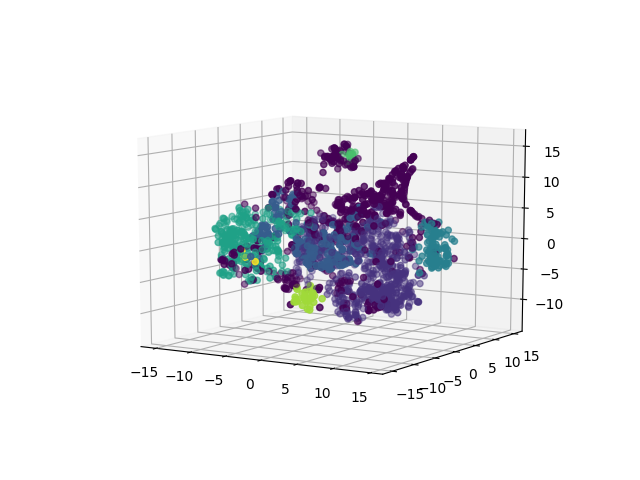

In [76]:
%matplotlib notebook
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(x_axis[:2000], y_axis[:2000], z_axis[:2000], c = b[:2000])

<IPython.core.display.Javascript object>


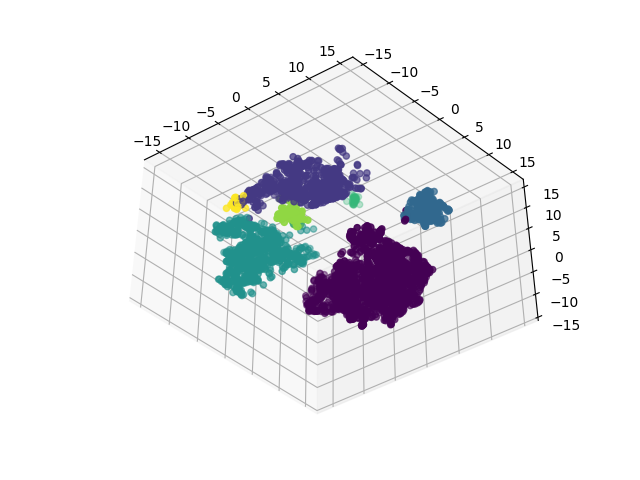

In [78]:
%matplotlib notebook
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(x_axis[x1['target'] >= 0], y_axis[x1['target'] >= 0], z_axis[x1['target'] >= 0], c = x2.target)

In [70]:
x2.shape

(3774, 24)

In [174]:
#x1 = x1.drop('target', axis=1)

In [77]:
max(b)

6

In [79]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [107]:
RF = RandomForestClassifier(n_estimators=1000, max_depth=10, n_jobs=-1)

In [101]:
X = x2.drop('target', axis=1)[:3000]
y = x2.target[:3000]
X_test = x2.drop('target', axis=1)[3200:]
y_test = x2.target[3200:]

In [120]:
mode = RF.fit(x2.drop('target', axis=1), x2.target)

In [108]:
a11 = cross_val_score(RF, x2.drop('target', axis=1), x2.target, cv=5)

In [109]:
a11

array([0.99865591, 0.99730458, 0.9972973 , 0.99729364, 0.99864315])

In [111]:
rf = mode.predict(X_test)

In [113]:
yyy = pd.DataFrame({"y_test": y_test, "rf": rf })
#yyy["rf"] = rf
#yyy["y_test"] = y_test

In [119]:
yyy

,y_test,rf
4691,3,3
4692,1,1
4693,1,1
4694,1,1
4695,0,0
4697,1,1
4698,3,3
4700,0,0
4705,1,1
4706,0,0


Обученная

<IPython.core.display.Javascript object>


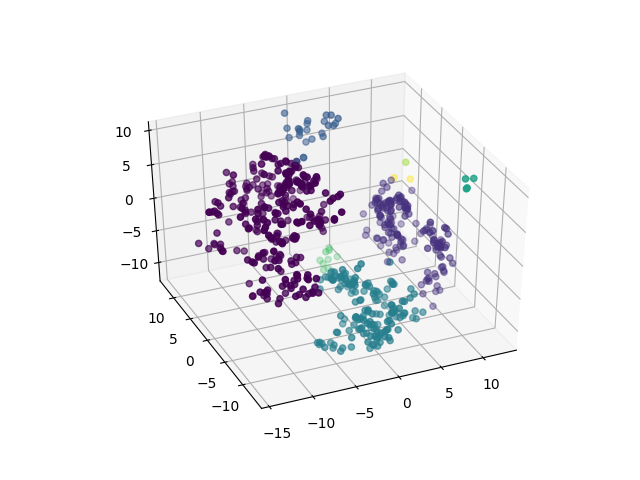

In [115]:
%matplotlib notebook
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(x_axis[x1['target'] >= 0][3200:3859], y_axis[x1['target'] >= 0][3200:3859], z_axis[x1['target'] >= 0][3200:3859], c = rf)


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

Как долно быть

In [135]:
# %matplotlib notebook
# fig = plt.figure()
# ax = plt.axes(projection='3d')

# ax.scatter3D(x_axis[3500:], y_axis[3500:], z_axis[3500:], c = y_test)

In [121]:
import pickle


In [122]:
file = open('RF1', 'wb')
file.write(pickle.dumps(mode))
file.close()